<a href="https://colab.research.google.com/github/Marliezz/Final-Project-CO2-emissions---Marlies/blob/main/Final_Project_CO2_emissions_Marlies_Brokking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Een vraagstuk 1: Wat is de grootste factor van een grote CO2 uitstoot per capita van de landen?**

*Inleiding en methode*

Ik ga kijken naar de afzonderlijke rol van 3 factoren voor een CO2 uitstoot per capita. Die 3 factoren zijn: 1) GDP per capita, 2) Energie per capita, en 3) De hoeveelheid calorieën vanuit dierlijke eiwitten die een gemiddelde persoon per dag nuttigt.
CO2 per capita houdt een jaarlijkse totale CO2-uitstoot in (exclusief veranderingen in landgebruik), gemeten in ton per persoon. GDP per capita geeft informatie over de economisch groei en het inkomensniveau op basis van koopkrachtpariteit (PPP). Deze gegevens zijn gecorrigeerd voor inflatie en voor verschillen in de kosten van levensonderhoud tussen landen. Deze waarden zijn uitgedrukt in internationale dollars tegen prijzen van 2017. De definitie van Energie per capita is een primair energieverbruik per hoofd van de bevolking, gemeten in kilowattuur per persoon. De waarde van de dagelijkse hoeveelheid calorieën vanuit dierlijke eiwitten wordt uitgedrukt in kilocalorieën per persoon per dag.

Ik heb drie databestanden: co2, gdp per capita, en diets. Tijdens het samenvoegen van die databestanden bepaal ik welke kolommen die ik ga gebruiken waarbij die relevant zijn voor die eerste vraagstuk.

*Resultaten*

CO2 per capita en GDP per capita is positief gecorreleerd. Dit betekent dat landen met een hogere GDP per capita ook een hogere CO2 uitstoot per capita hebben. De Pearson correlatiecoëfficient is 0.73, met een p-waarde van 0.00, wat een sterke, significante correlatie aangeeft.

CO2 per capita en Energie per capita is positief gecorreleerd. Dit betekent dat landen die een hogere energie per capita hebben, ook een hogere CO2 uitstoot per capita hebben. De Pearson correlatiecoëfficient is 0.89, met een p-waarde van 0.00, wat een sterke, significante correlatie aangeeft.

CO2 per capita en de dagelijkse calorieeniname per persoon vanuit dierlijke eiwitten is positief gecorreleerd. Dit betekent dat de landen waarin de mensen gemiddeld een hogere calorieën iname vanuit dierlijke eiwitten hebben, ook een hogere CO2 uitstoot per capita hebben. De Pearson correlatiecoëfficient is 0.59, met een p-waarde van 0.00, wat een sterke, significante correlatie aangeeft.

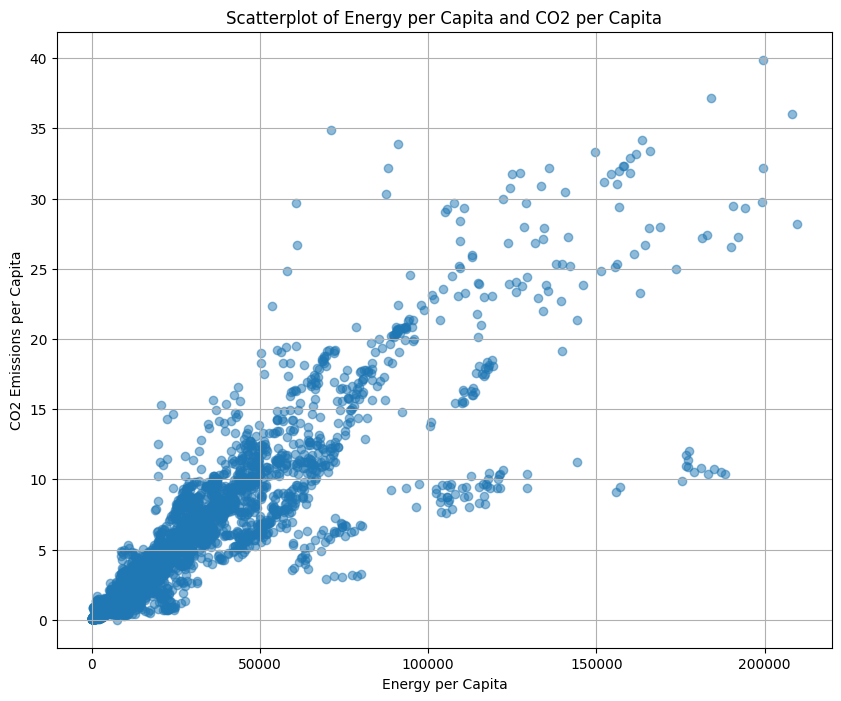

*Conclusie en discussie*

Er zijn positieve, en significante correlaties tussen CO2 per capita en drie geanalyseerde factoren: GDP per capita, energie per capita en gemiddeld dagelijkse calorieeninname per persoon vanuit dierlijke eiwitten. Van deze drie schijnt de energie per capita het grootste factor te zijn van het CO2 uitstoot.

De kanttekeningen zijn:
- De correlatie betekent niet automatisch een oorzaak/gevolg verband. Er kan een andere gemeenschappelijke factor in het spel zijn. Het is aan te bevelen om in verder onderzoek de andere factoren mee te nemen.
- Een beperking is dat een databestand met GDP per capita enkel data vanaf de jaar 1990 bevat. Dit betekent dat tijdens het samenvoegen de CO2 data vóór jaar 1990 werd weggelaten. Dit betekent dat voor deze vraagstuk de CO2 per capita waarden enkel tussen 1990 en 2021 zijn meegenomen in de analyses. Dan nog zijn er geen waarden bekend voor sommige jaartallen voor sommige landen. Dat kunnen de analyses vertekenen. Om daar meer zicht op te hebben is aan te bevelen om in verder onderzoek te kijken naar de andere vormen van het samenvoegen en de patroon van de missende waarden. Voor het uitvoeren van de correlatie analyses is immers een vereiste dat er geen missende waarden zijn.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from scipy.stats import pearsonr

In [37]:
# Load files
df_co2 = pd.read_csv("https://raw.githubusercontent.com/Marliezz/Final-Project-CO2-emissions---Marlies/main/owid-co2-data.csv")
df_gdp_capita = pd.read_csv("https://raw.githubusercontent.com/Marliezz/Final-Project-CO2-emissions---Marlies/main/gdp-per-capita-worldbank.csv") # GDP from 1990
df_diets = pd.read_csv("https://raw.githubusercontent.com/Marliezz/Final-Project-CO2-emissions---Marlies/main/diets-data.csv")

In [40]:
#df_gdp_capita

#df_co2.columns
#df_energy.columns
#df_diets.columns
#df_co2

In [41]:
# Rename the column Entity to country before merging.
df_diets.rename(columns={'Entity': 'country', 'Year': 'year'}, inplace=True)
df_gdp_capita.rename(columns={'Entity': 'country', 'Year': 'year', 'GDP per capita, PPP (constant 2017 international $)': 'GDP per capita'}, inplace=True)

#df_diets
#df_gdp_capita

In [43]:
# Merge dataframes and use certain columns only
merged_df = pd.merge(df_co2[['country', 'year', 'population', 'co2', 'co2_per_capita', 'energy_per_capita']], df_diets[['country', 'year', 'Daily caloric intake per person that comes from animal protein']], on=['country', 'year']).copy()
#display(merged_df)

In [44]:
# Merge with the file GDP_capita
merged_df2 = pd.merge(merged_df[['country', 'year', 'population', 'co2', 'co2_per_capita', 'energy_per_capita', 'Daily caloric intake per person that comes from animal protein']], df_gdp_capita[['country', 'year', 'GDP per capita']], on=['country', 'year']).copy()
#merged_df2

In [45]:
# Checking for the country names! Bv. for removing regions.
merged_df2.loc[:, 'country'].unique()
merged_df2.loc[:, 'country'].nunique()

184

In [46]:
# Removing non-applied country groups
df3_filtered = merged_df2[merged_df2['country'].str.contains("World|High-income countries|Low-income countries|Lower-middle-income countries|Upper-middle-income countries|European Union") == False].reset_index(drop=True).copy()
df3_filtered.loc[:, 'country'].unique()
df3_filtered.loc[:, 'country'].nunique()

178

In [47]:
#df3_filtered

<Axes: >

country                                                           0
year                                                              0
population                                                        0
co2                                                               0
co2_per_capita                                                    0
energy_per_capita                                                 0
Daily caloric intake per person that comes from animal protein    0
GDP per capita                                                    0
dtype: int64

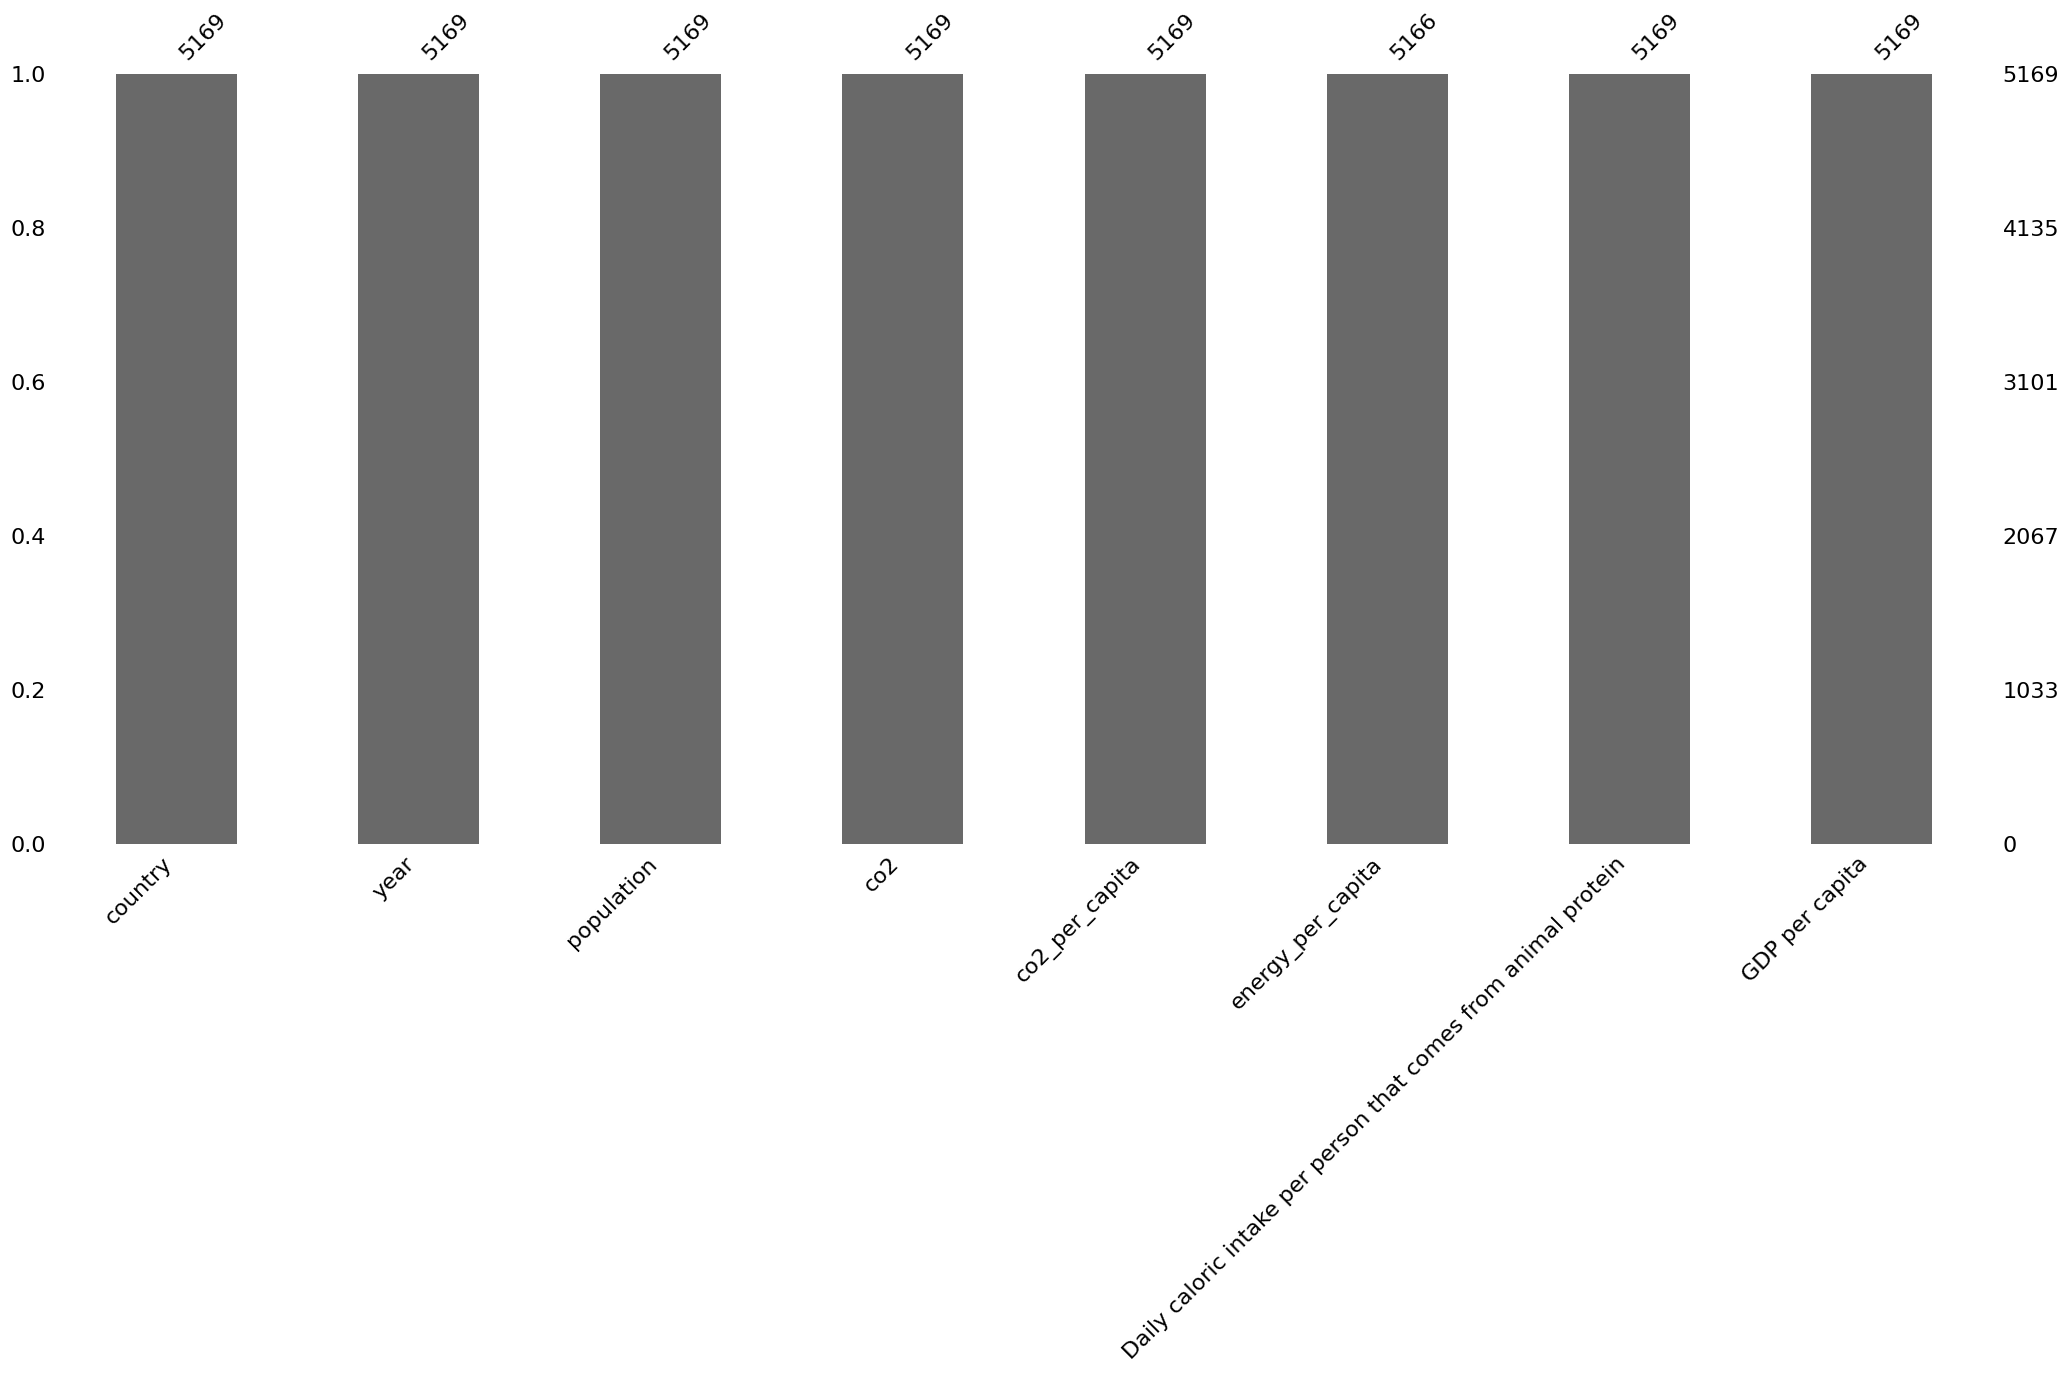

In [48]:
# Checking for missing values and drop all missing values (for analyses)

import missingno as msno
display(msno.bar(df3_filtered))
#df3_filtered.isnull().sum()
df3_filtered.dropna(inplace=True)
df3_filtered.isnull().sum()

In [49]:
# Correlation between co2 per capita and GDP per capita
corr_coefficient, p_value = pearsonr(df3_filtered['co2_per_capita'], df3_filtered['GDP per capita'])

corr_from_df = df3_filtered[['co2_per_capita', 'GDP per capita']].corr(numeric_only=True)
print('\n')
print("Correlation with pearsonr = ", corr_coefficient, " with a p-value of ", p_value)
print('\n')
print("correlation with corr = ", corr_from_df)



Correlation with pearsonr =  0.7292034388817927  with a p-value of  0.0


correlation with corr =                  co2_per_capita  GDP per capita
co2_per_capita        1.000000        0.729203
GDP per capita        0.729203        1.000000


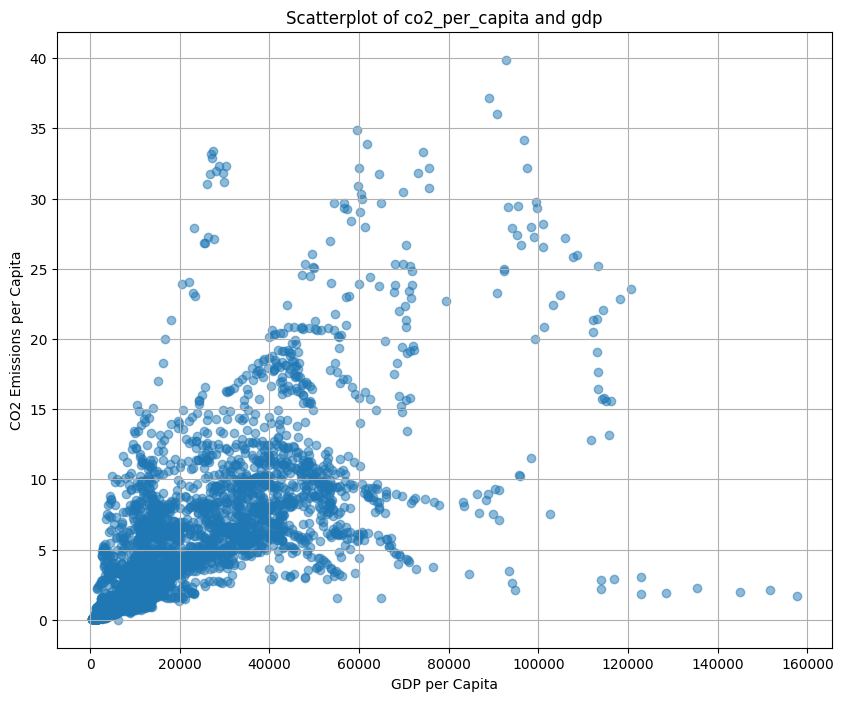

In [50]:
# A function for making a graph for a correlation between GDP and co2
def plotco2(x, y, x_label, y_label, title):
    plt.figure(figsize=(10, 8))
    plt.scatter(x, y, alpha=0.5)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid()
    plt.show()

plotco2(df3_filtered['GDP per capita'], df3_filtered['co2_per_capita'],
                  "GDP per Capita", "CO2 Emissions per Capita",
                  "Scatterplot of co2_per_capita and gdp")

In [51]:
# Correlation between co2 per capita and energy per capita
corr_coefficient, p_value = pearsonr(df3_filtered['co2_per_capita'], df3_filtered['energy_per_capita'])

corr2_from_df = df3_filtered[['co2_per_capita', 'energy_per_capita']].corr(numeric_only=True)
print('\n')
print("Correlation with pearsonr = ", corr_coefficient, " with a p-value of ", p_value)
print('\n')
print("correlation with corr = ", corr2_from_df)



Correlation with pearsonr =  0.8947168180705584  with a p-value of  0.0


correlation with corr =                     co2_per_capita  energy_per_capita
co2_per_capita           1.000000           0.894717
energy_per_capita        0.894717           1.000000


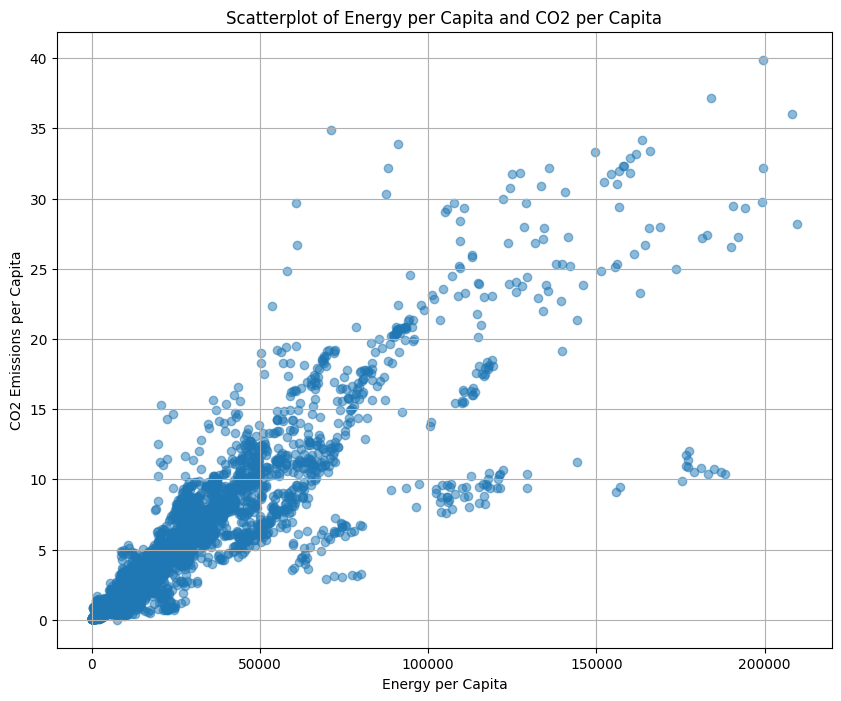

In [ ]:
# Using the same function for making a graph for a correlation between Energy per Capita and co2
plotco2(df3_filtered['energy_per_capita'], df3_filtered['co2_per_capita'],
                  "Energy per Capita", "CO2 Emissions per Capita",
                  "Scatterplot of Energy per Capita and CO2 per Capita")

In [52]:
# Correlation between co2 per capita and Daily caloric intake per person that comes from animal protein
corr_coefficient, p_value = pearsonr(df3_filtered['co2_per_capita'], df3_filtered['Daily caloric intake per person that comes from animal protein'])

corr3_from_df = df3_filtered[['co2_per_capita', 'Daily caloric intake per person that comes from animal protein']].corr(numeric_only=True)
print('\n')
print("Correlation with pearsonr = ", corr_coefficient, " with a p-value of ", p_value)
print('\n')
print("correlation with corr = ", corr3_from_df)



Correlation with pearsonr =  0.5892046072357455  with a p-value of  0.0


correlation with corr =                                                      co2_per_capita  \
co2_per_capita                                            1.000000   
Daily caloric intake per person that comes from...        0.589205   

                                                    Daily caloric intake per person that comes from animal protein  
co2_per_capita                                                                               0.589205               
Daily caloric intake per person that comes from...                                           1.000000               


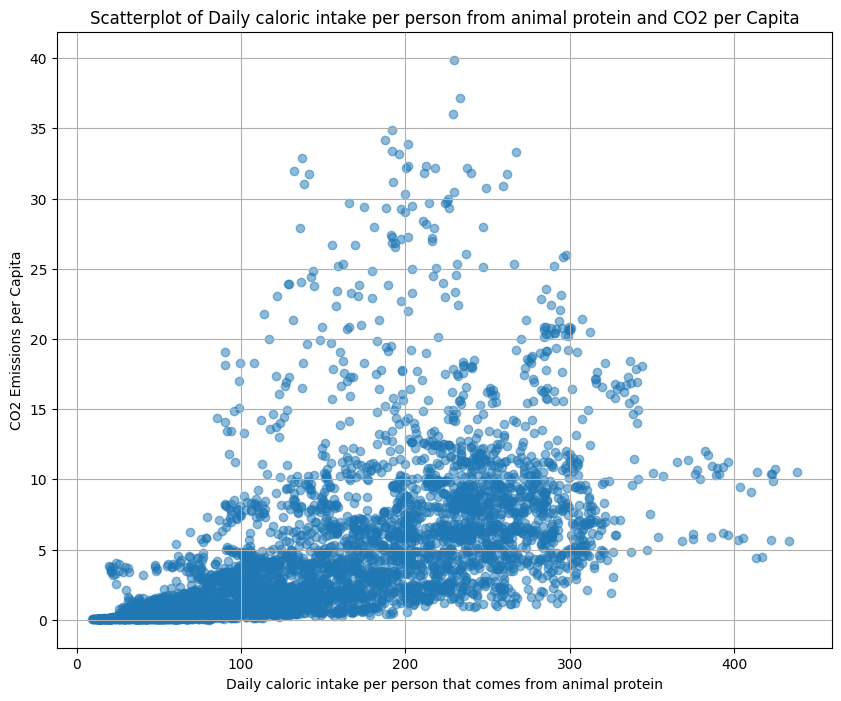

In [53]:
# Using the same function for making a graph for a correlation between Daily caloric intake per person from animal protein and co2
plotco2(df3_filtered['Daily caloric intake per person that comes from animal protein'], df3_filtered['co2_per_capita'],
                  "Daily caloric intake per person that comes from animal protein", "CO2 Emissions per Capita",
                  "Scatterplot of Daily caloric intake per person from animal protein and CO2 per Capita")

**Een vraagstuk 2: Welke landen zetten de grootste stappen in het terugdringen van de CO2-uitstoot?**

*Inleiding en methode*

Voor deze vraagstuk gebruik ik een dezelfde databestand met CO2 waarden met een andere benaming voor de dataframe. CO2 wordt uitgedrukt in jaarlijkse totale uitstoot van CO2 (exclusief veranderingen in landgebruik), gemeten in miljoen ton.

In deze dataframe bevatten CO2 waarden die zijn gemeten van de jaar 1750 tot en met 2022. Alhoewel voor sommige jaren en voor sommmige landen zijn er ontbrekende waarden. Ik kijk naar het tijdsblok tussen het jaar 1990 en 2022, omdat vanaf het jaar 1990 minder missende waarden zijn wat mogelijk meer betrouwbare resultaten opleveren. Om rekening te houden met de bevolkingsgrootte van het land, gebruik ik CO2 waarden per capita.

Ik heb twee benaderingen gebruikt om deze vraagstuk te beantwoorden.
1) Om het verschil in CO2 waarden per capita per land te krijgen tussen het jaar 1990 en 2022, heb ik een relatieve CO2 percentage laten berekenen.

2) Ik heb een 75e percentiel als grenswaarde gebruikt om enkel de landen waarbij CO2 per capita waarde hoger is dan 7.5 mee te nemen in de analyses om te kijken naar hun relatieve percentage. Voor het maken van een grafiek heb ik in plaats van een relatieve CO2 uitstoot de CO2 per capita waarden van alle jaren tussen 1990 en 2022 gebruikt voor tien landen die relatief grootste afname hebben, omdat de veranderingen meer nauwkeurig en betrouwbaar te zien zijn.

*Resultaten*

1) De tien landen die een relatief grootste afname in CO2 uitstoot tussen 1990 en 2022 hebben zijn Moldova, Ukraine, Curacao, Democratic Republic of Congo, Nauru, Kyrgyzstan, Somalia, Estonia, North Korea, en Zimbabwe. De percentages varieren tussen -79.51% en -64.69%. Alhoewel zes van die landen hebben al een lagere dan gemiddelde (in vergelijking met andere landen) CO2 uitstoot in het jaar 1990, waardoor hun percentage van de afname in het jaar 2022 relatief makkelijker hoger zijn dan voor de andere landen.

2) Uit de reeks met de landen die CO2 per capita uitstoot boven 75e percentiel in het jaar 1990 hebben, hebben deze tien landen relatief grootste afname tussen 1990 en 2022. Die landen zijn: Moldova, Ukraine, Curacao, Nauru, Estonia, Luxembourg, United Kingdom, Denmark, Romania, en Lithuania. Hun percentages varieren tussen -79.51 en -51.21%.

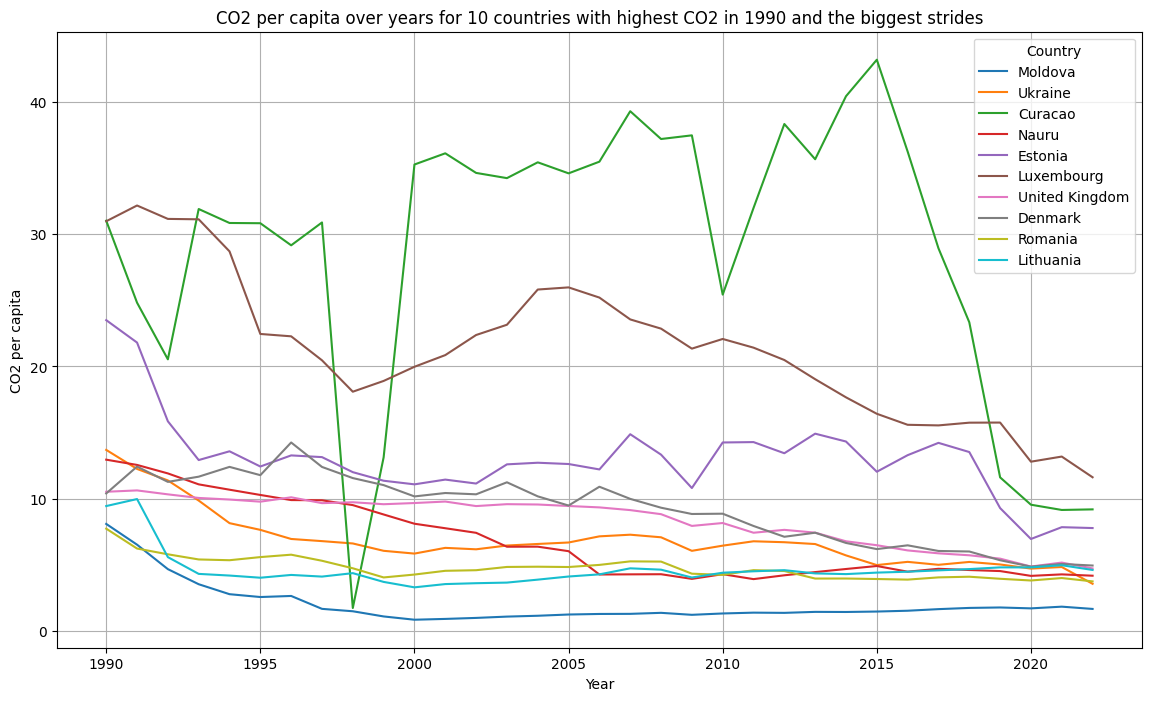

*Conclusie en discussie*

Uit deze twee benaderingen van de analyses komen vijf overeenkomende landen naar voren die relatief grootste afname van hun CO2 per capita uitstoot tussen het jaar 1990 en 2022 hebben. Die vijf landen betreffen Moldova, Ukraine, Curacao, Nauru en Estonia.

De kanttekeningen van mijn analyses zijn:
- Er zijn 10 landen met de missende waarde voor het jaar 1990 en zij zijn niet meegenomen in de analyses. Die landen zijn: Antarticia, Christmas Island, East Timor, Kosovo, Marshall Islands, Micronesia, Monaco, Puerto Rico, San Marino and Vatican. Daarnaast zijn 2 landen met de CO2 waarde van 0.00 voor het jaar 1990, namelijk Eritrea and Namibie. Voor die landen is het percentage niet juist, omdat het percentage 0 blijft bij het delen door 0. Alhoewel, hun CO2 waarde is in het jaar 2022 ook erg laag.

- Er zijn diverse analyses mogelijk om deze vraagstuk te beantwoorden, bijvoorbeeld door de absolute waarden van elkaar af te trekken, of een relatieve percentage te berekenen. Elke manier heeft haken en ogen, omdat het voordelig of nadelig kunnen zijn voor de landen juist met kleinere CO2 uitstoot of voor landen met grotere CO2 uitstoot. Dit betekent dat de resultaten van deze analyses met voorzichtigheid geinterpreteerd moeten worden.  

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [56]:
# Load datafile
Q2_df_co2 = pd.read_csv("https://raw.githubusercontent.com/Marliezz/Final-Project-CO2-emissions---Marlies/main/owid-co2-data.csv")

In [57]:
# Just keep these columns: country, year, population, co2, co2_per_capita (a new dataframe df2_co2)
Q2_df2_co2 = Q2_df_co2.loc[:, ['country', 'year', 'population', 'co2', 'co2_per_capita']].copy()
#Q2_df2_co2.head(10)
#Q2_df2_co2

In [58]:
# Check for country names
#Q2_df2_co2.loc[:, 'country'].unique()
#Q2_df2_co2.loc[:, 'country'].nunique()

In [60]:
# Removing non-applied country groups
Q2_df3_filtered = Q2_df2_co2[Q2_df2_co2['country'].str.contains("Africa (GCP)|Asia|America|Europe|Union|World|countries|International|Fires|Jones|GCP|Oceania") == False].reset_index(drop=True).copy()
#Q2_df3_filtered.loc[:, 'country'].unique()
Q2_df3_filtered.loc[:, 'country'].nunique()

<ipython-input-60-17a217a5dba0>:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  Q2_df3_filtered = Q2_df2_co2[Q2_df2_co2['country'].str.contains("Africa (GCP)|Asia|America|Europe|Union|World|countries|International|Fires|Jones|GCP|Oceania") == False].reset_index(drop=True).copy()


221

In [61]:
#Q2_df3_filtered


<Axes: >

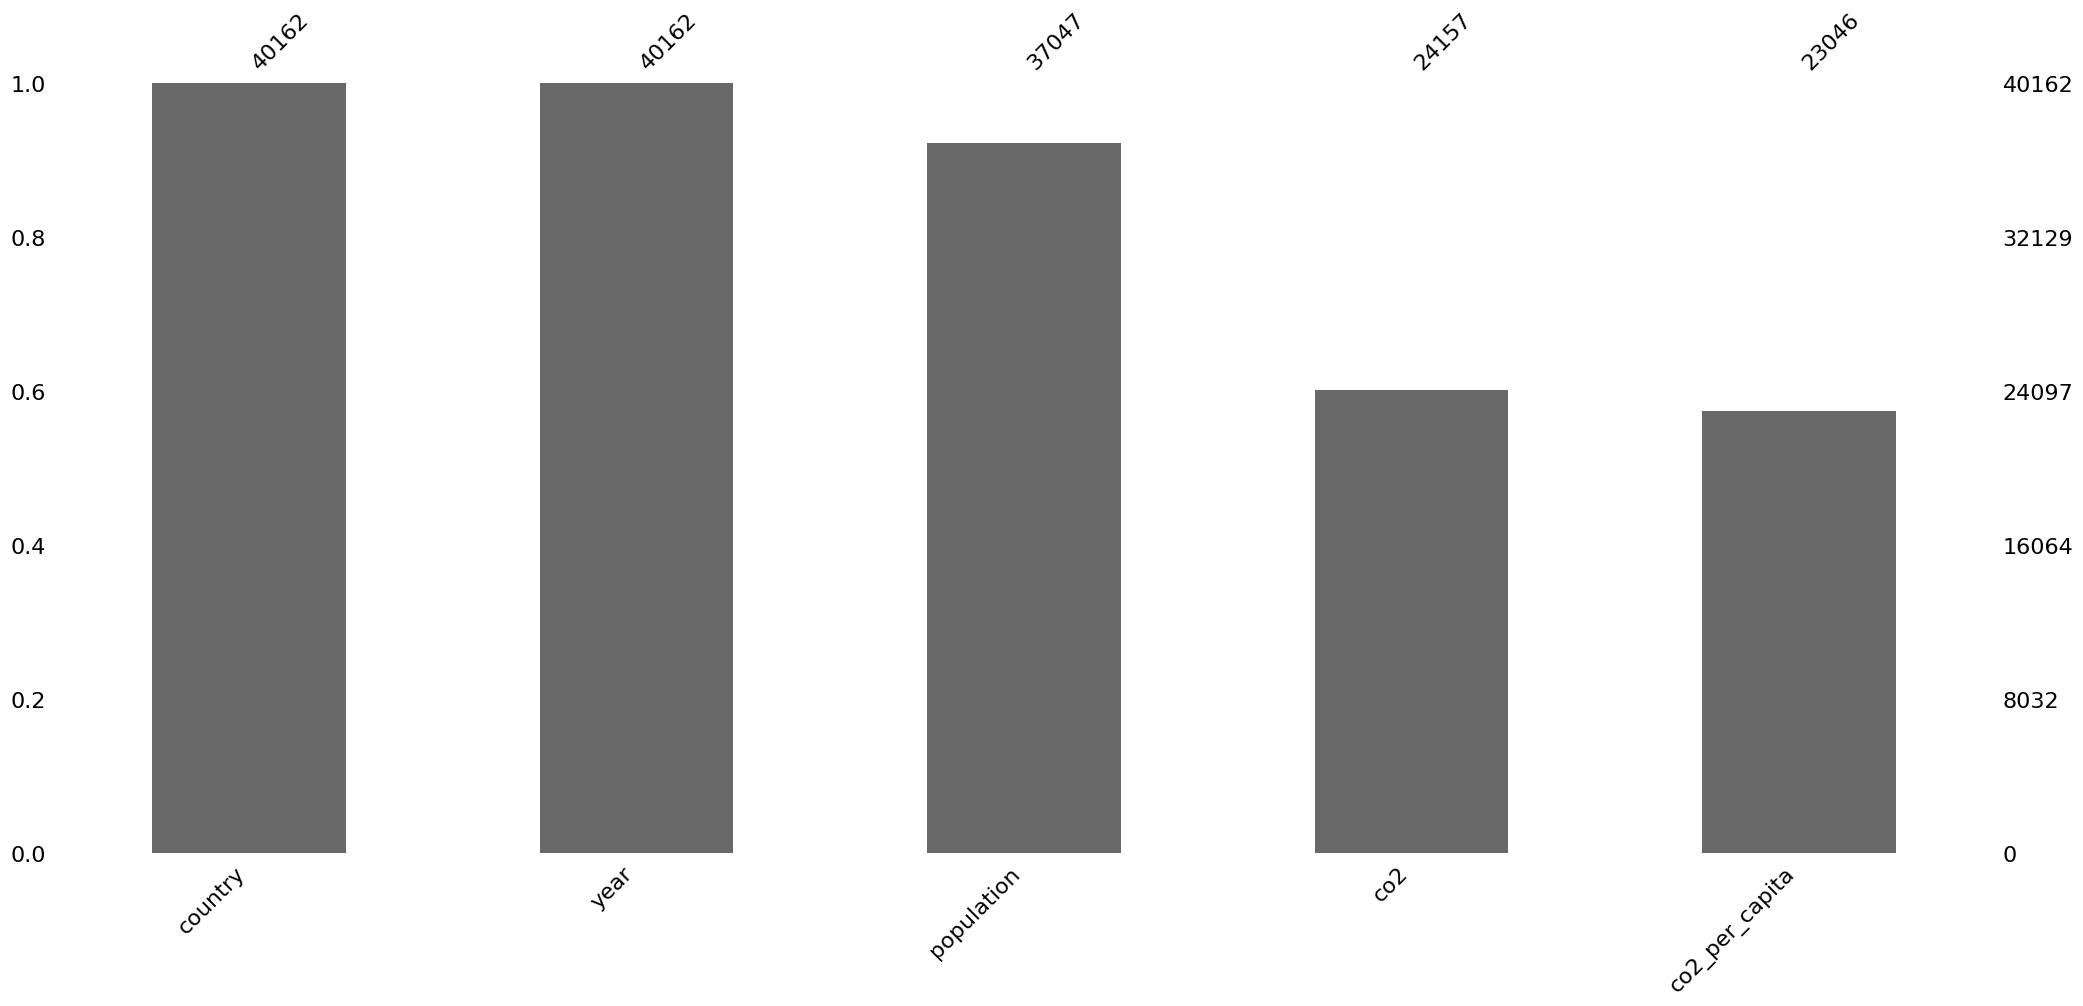

In [72]:
# Checking for missing values

import missingno as msno
display(msno.bar(Q2_df3_filtered))
#df3_filtered.isnull().sum()

pd.set_option('display.max_rows', None) # This is a one-off
# Grouping by the column 'Year'
#Q2_df3_filtered.groupby('year')['co2_per_capita'].apply(lambda x: x.isnull().sum())

In [73]:
# I will use the year 1990 and the year 2022 for every country

Q2_df4_filteredyear = Q2_df3_filtered[Q2_df3_filtered['year'].isin([1990, 2022])].copy()
#Q2_df4_filteredyear

# Pivot de dataframe
Q2_df5_pivot = Q2_df4_filteredyear.pivot(index='country', columns = 'year', values='co2_per_capita').copy()
Q2_df5_pivot.isnull().sum()

Q2_df5_pivot.sort_values(by=1990, ascending=True)

# Identifying rows with NaN values in the column 1990 (and 2022)
mask = Q2_df5_pivot.isna().any(axis=1)
# Filter the df to show rows with NaN values
rows_with_nan = Q2_df5_pivot[mask]
print(rows_with_nan)


year                  1990   2022
country                          
Antarctica             NaN    NaN
Christmas Island       NaN    NaN
East Timor             NaN  0.499
Kosovo                 NaN  4.831
Marshall Islands       NaN  3.635
Micronesia (country)   NaN  1.324
Monaco                 NaN    NaN
Puerto Rico            NaN    NaN
San Marino             NaN    NaN
Vatican                NaN    NaN


In [65]:
# Calculate the relative change in percentage with lambda function
Q2_df5_pivot['rel_co2_percentage'] = Q2_df5_pivot.apply(lambda row: ((row[2022] / row[1990] * 100) - 100) if row[1990] !=0 else 0, axis=1)
#Q2_df5_pivot

In [66]:
# Find smallest / largest changes
Q2_df5_pivot.nlargest(10, 'rel_co2_percentage')
Q2_df5_pivot.nsmallest(10, 'rel_co2_percentage')

year,1990,2022,rel_co2_percentage
country,,,
Moldova,8.089,1.657,-79.515391
Ukraine,13.689,3.558,-74.008328
Curacao,31.030,9.189,-70.386723
Democratic Republic of Congo,0.118,0.036,-69.491525
Nauru,12.950,4.170,-67.799228
Kyrgyzstan,4.323,1.425,-67.036780
Somalia,0.112,0.037,-66.964286
Estonia,23.506,7.776,-66.919084
North Korea,5.691,1.951,-65.717800


In [67]:
# Include only countries which have the higher CO2 value in 1990

# Calculate the average of CO2 per capita values in 1990 -> get the descriptive statistics
Q2_df5_pivot[1990].describe()


count    211.000000
mean       4.921469
std        6.168580
min        0.000000
25%        0.444500
50%        2.516000
75%        7.465000
max       31.030000
Name: 1990, dtype: float64

In [68]:
Q2_df6_bigCO2 = Q2_df5_pivot[Q2_df5_pivot[1990] > 7.5].copy()
Q2_df6_bigCO2.nlargest(10, 1990)

#Q2_df6_bigCO2


year,1990,2022,rel_co2_percentage
country,,,
Curacao,31.030,9.189,-70.386723
Luxembourg,30.989,11.618,-62.509277
United Arab Emirates,27.210,25.833,-5.060639
Qatar,25.836,37.601,45.537235
Estonia,23.506,7.776,-66.919084
Kuwait,22.572,25.578,13.317384
Bahrain,22.333,25.672,14.950969
Brunei,20.828,23.950,14.989437
United States,20.642,14.950,-27.574847


In [69]:
# Which 10 countries have the relative biggest decreases?
Q2_df6_bigCO2.nsmallest(10, 'rel_co2_percentage')

year,1990,2022,rel_co2_percentage
country,,,
Moldova,8.089,1.657,-79.515391
Ukraine,13.689,3.558,-74.008328
Curacao,31.030,9.189,-70.386723
Nauru,12.950,4.170,-67.799228
Estonia,23.506,7.776,-66.919084
Luxembourg,30.989,11.618,-62.509277
United Kingdom,10.522,4.720,-55.141608
Denmark,10.395,4.940,-52.477152
Romania,7.729,3.740,-51.610816


In [70]:
# Creating a plot of these 10 countries (with larger CO2 emission in 1990)
# I want to include all CO2 values for all years between 1990 and 2022. I need the dataframe (before pivoting).

Q2_df7_graph = Q2_df3_filtered[Q2_df3_filtered['year'].isin(range(1990, 2023))].copy()
countries = ['Moldova', 'Ukraine', 'Curacao', 'Nauru', 'Estonia', 'Luxembourg', 'United Kingdom', 'Denmark', 'Romania', 'Lithuania']
Q2_df7_graph = Q2_df7_graph[Q2_df7_graph['country'].isin(countries)]
#Q2_df7_graph

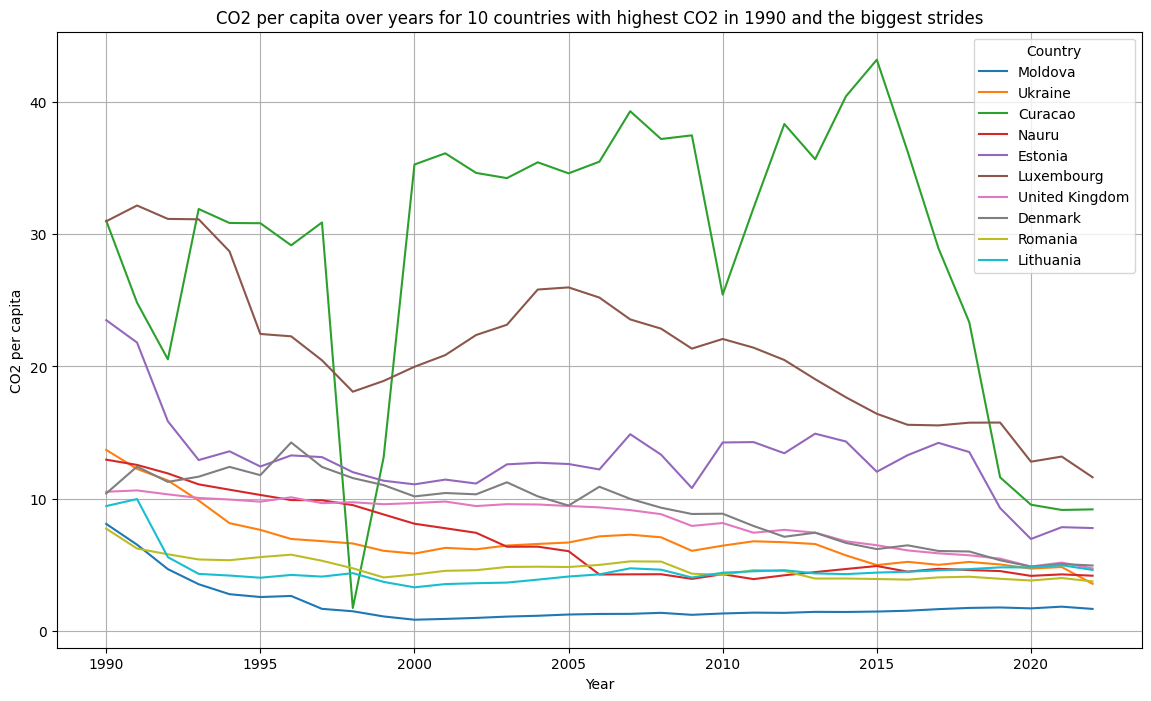

In [71]:
# Year at x-axis, CO2 per capita at y-axis and 10 countries as lines

plt.figure(figsize=(14, 8))
for country in countries:
  country_values = Q2_df7_graph[Q2_df7_graph['country'] == country]
  if not country_values.empty:
    plt.plot(country_values['year'], country_values['co2_per_capita'], label=country)

plt.xlabel('Year')
plt.ylabel('CO2 per capita')
plt.title('CO2 per capita over years for 10 countries with highest CO2 in 1990 and the biggest strides')
plt.legend(title='Country')
plt.grid()
plt.show()

**Vraagstuk 3: Welke niet-fossiele energietechnologie zal in de toekomst de beste prijs hebben?**

*Inleiding en methode*

Hernieuwbare energie is een verzamelnaam die wordt gebruikt om verschillende energiebronnen aan te duiden. Onder hernieuwbare energiebronnen vallen doorgaans waterkracht, zonne-energie, windenergie, geothermische energie, biomassa en golf- en getijdenenergie.

Bij deze vraagstuk heb ik zeven van hernieuwbare energiebronnen meegenomen in de analyses: 1) fotovoltaïsche zonne-energie, 2) geconcentreerde zonnekracht, 3) windenergie op zee, 4) windenergie op land, 5) bio-energie, 6) geothermische energie, en 7) waterkracht. In het dataset zijn de kosten voor de hernieuwbare energiebronnen genivelleerd; met de gemiddelde kosten per eenheid opgewekte energie gedurende de levensduur van een nieuwe energiecentrale. Deze gegevens zijn uitgedrukt in Amerikaanse dollars per kilowattuur. De dataset bevat de prijzen voor die hernieuwbare energiebonnen in de bepaalde landen en een wereld. Er wordt gecorrigeerd voor inflatie, maar er wordt geen rekening mee gehouden verschillen in de kosten van levensonderhoud tussen landen.

Aangezien er heleboel missende waarden zijn tot en met het jaar 2009 (behalve voor windenergie op zee en in mindere mate voor de fotovoltaïsche zonne-energie), heb ik besloten om alleen de waarden voor het jaar 2010 tot en met 2022 te gebruiken van de hele wereld als gemiddelde. Voor de lineair regressie is namelijk een vereiste dat er geen missende waarden zijn, anders wordt een hele rij voor een bepaalde jaar eruit gelaten. Dat lijkt me juist extra impact te geven op de analyses. Daarnaast wil ik al deze zeven hernieuwbare energiebronnen meenemen in de analyses. Via de interpolatie-methode is ene missende waarde voor het jaar 2011 voor de geothermische energie opgevuld.

*Resultaten*

Uit de toekomstige voorspellingen voor het jaar 2040 (waarbij die zijn afgeleid van de regressiecoefficients van de prijzen van het jaar 2010 tot en met 2022) blijkt dat de fotovoltaïsche zonne-energie waarschijnlijk het goedkoopst zal zijn, met de prijs van -0.52 dollar. Op de tweede plaats volgt een geconcentreerde zonnekracht, met de prijs van -0.29 dollar. Tenslotte, op de derde en vierde plaats volgen een windenergie op zee, met de prijs van -0.14 dollar, en een windenergie op land, met de prijs van -0.09 dollar. Voor deze vier hernieuwbare energiebronnen zijn de kosten gedaald en zullen vermoedelijk blijven dalen. Echter, voor drie andere hernieuwbare energiebronnen (bio-energie, geothermische energie, en waterkracht) zijn de prijzen niet gedaald, maar ongeveer gelijk gebleven.


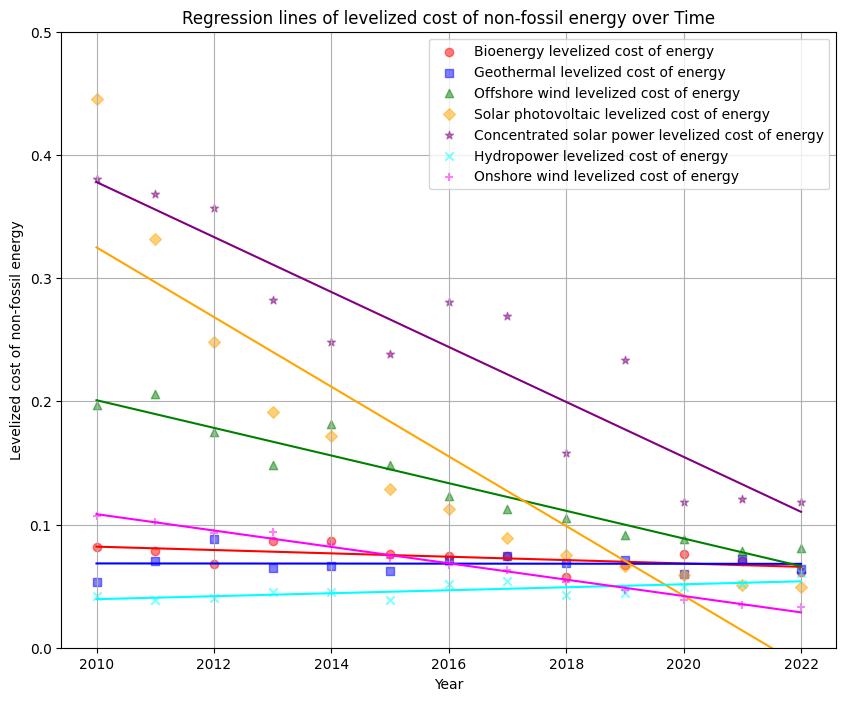

*Conclusie en discussie*

Met betrekking tot de kosten van deze zeven hernieuwbare energiebronnen voor het jaar 2040 schijnt een fotovoltaïsche zonne-energie het meest veelbelovend te zijn.

De beperkingen en kanttekeningen van mijn analyses zijn:
- vanwege de vele missende waarden in deze dataset, bevatten mijn analyses enkel de data tussen het jaar 2010 en 2022 van de hele wereld als gemiddelde. Dit kan een vertekend beeld geven voor de regressielijnen en voor de voorspellingen in de toekomst, omdat enkele beschikbare data van vóór het jaar 2010 voor sommige groene energiebronnen niet werden meegenomen.

- De scatterplots dienen met voorzichtigheid met elkaar vergeleken te worden, omdat voor elke schatterplot de hoogte van een y-as anders is. Alhoewel, op die manier is binnen elke grafiek het verschil in de kosten over jaren goed zichtbaar.

- Voor het uitvoeren van de lineaire regressie dienen normaliter gecheckt te worden of er aan de assumpties voldaan zijn en of hierbij de lineair regressie correct uitgevoerd en geinterpreteerd kan worden. In mijn analyses heb ik dat niet voor alle assumpties gedaan. Dit betekent dat de resultaten van de lineare regressie met voorzichtigheid geinterpreteerd moeten worden.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [74]:
# Load data files
Q3_df_costenergy = pd.read_csv("https://raw.githubusercontent.com/Marliezz/Final-Project-CO2-emissions---Marlies/main/levelized-cost-of-energy.csv")

#Q3_df_costenergy.columns
#Q3_df_costenergy

In [75]:
# De omvang van de dataset en datatypes verkennen

#Q3_df_costenergy.shape
#Q3_df_costenergy.dtypes

In [76]:
# Rename the column Entity to Country and drop the column Code
Q3_df_costenergy.rename(columns={'Entity': 'Country'}, inplace=True)
Q3_df_costenergy.drop(columns='Code', inplace=True)
#Q3_df_costenergy

In [77]:
# Checking for country names
#Q3_df_costenergy.loc[:, 'Country'].unique()
#Q3_df_costenergy.loc[:, 'Country'].nunique()

In [78]:
# Descriptive statistics and checking for the range of data
#Q3_df_costenergy.describe()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x800 with 0 Axes>

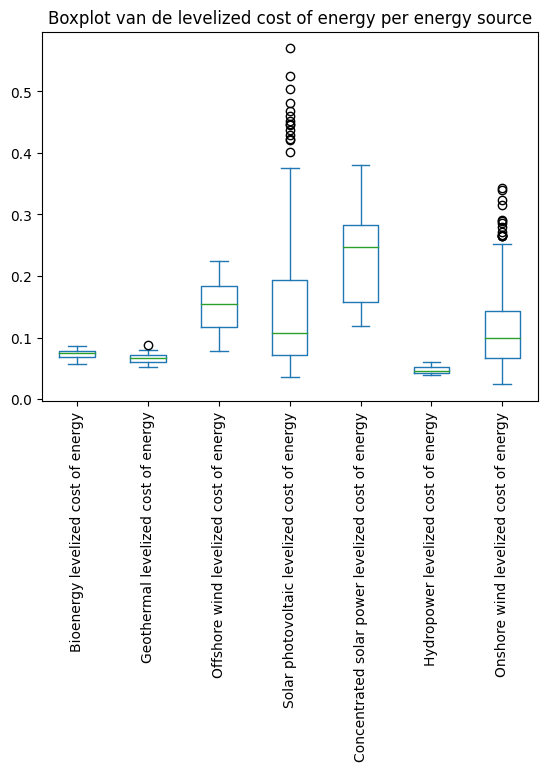

In [8]:
# Checking for outliers
plt.figure(figsize=(10, 8))
Q3_df_costenergy.loc[:, ['Bioenergy levelized cost of energy', 'Geothermal levelized cost of energy', 'Offshore wind levelized cost of energy', 'Solar photovoltaic levelized cost of energy', 'Concentrated solar power levelized cost of energy', 'Hydropower levelized cost of energy', 'Onshore wind levelized cost of energy']].plot(kind='box')
plt.title('Boxplot van de levelized cost of energy per energy source')
plt.xticks(rotation=90)
plt.show

In [9]:
#Checking for missing values

import missingno as msno
#display(msno.bar(Q3_df_costenergy))
#msno.heatmap(Q3_df_costenergy)
Q3_df_costenergy.isnull().sum()

Country                                                0
Year                                                   0
Bioenergy levelized cost of energy                   696
Geothermal levelized cost of energy                  694
Offshore wind levelized cost of energy               686
Solar photovoltaic levelized cost of energy          523
Concentrated solar power levelized cost of energy    696
Hydropower levelized cost of energy                  696
Onshore wind levelized cost of energy                  3
dtype: int64

In [10]:
# Making a function to check which values are not missing for 'Country' and 'Year'
def filter_missing_data(df, column_name):
  filter_mask = df[column_name].notna()
  filtered_data = df.loc[filter_mask, ['Country', 'Year', column_name]]
  return filtered_data

bio_rows_without_nan = filter_missing_data(Q3_df_costenergy, 'Bioenergy levelized cost of energy')
print(bio_rows_without_nan)

geothermal_rows_without_nan = filter_missing_data(Q3_df_costenergy, 'Geothermal levelized cost of energy')
print(geothermal_rows_without_nan)

offwind_rows_without_nan = filter_missing_data(Q3_df_costenergy, 'Offshore wind levelized cost of energy')
print(offwind_rows_without_nan)

con_solar_rows_without_nan = filter_missing_data(Q3_df_costenergy, 'Concentrated solar power levelized cost of energy')
print(con_solar_rows_without_nan)

hydropower_rows_without_nan = filter_missing_data(Q3_df_costenergy, 'Hydropower levelized cost of energy')
print(hydropower_rows_without_nan)

    Country  Year  Bioenergy levelized cost of energy
670   World  2010                            0.082115
671   World  2011                            0.078753
672   World  2012                            0.067661
673   World  2013                            0.086412
674   World  2014                            0.086581
675   World  2015                            0.076327
676   World  2016                            0.074623
677   World  2017                            0.074508
678   World  2018                            0.057697
679   World  2019                            0.067484
680   World  2020                            0.076009
681   World  2021                            0.070519
682   World  2022                            0.061469
    Country  Year  Geothermal levelized cost of energy
670   World  2010                             0.052968
672   World  2012                             0.088407
673   World  2013                             0.064723
674   World  2014       

In [79]:
# Use only World and the year between 2010 and 2022

Q3_df2_selected = Q3_df_costenergy.loc[(Q3_df_costenergy['Country'] == 'World') & (Q3_df_costenergy['Year'].between(2010, 2022)), ['Country', 'Year', 'Bioenergy levelized cost of energy', 'Geothermal levelized cost of energy', 'Offshore wind levelized cost of energy', 'Solar photovoltaic levelized cost of energy', 'Concentrated solar power levelized cost of energy', 'Hydropower levelized cost of energy','Onshore wind levelized cost of energy']].copy()
#Q3_df2_selected

In [80]:
# Interpolate missing values
Q3_df3_interpolated = Q3_df2_selected.interpolate().copy()
#Q3_df3_interpolated

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x800 with 0 Axes>

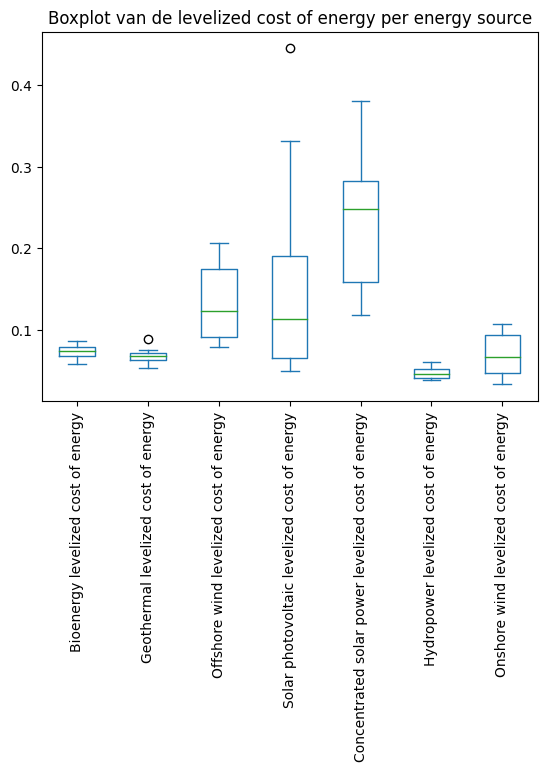

In [13]:
# Again checking for outliers
plt.figure(figsize=(10, 8))
Q3_df2_selected.loc[:, ['Bioenergy levelized cost of energy', 'Geothermal levelized cost of energy', 'Offshore wind levelized cost of energy', 'Solar photovoltaic levelized cost of energy', 'Concentrated solar power levelized cost of energy', 'Hydropower levelized cost of energy', 'Onshore wind levelized cost of energy']].plot(kind='box')
plt.title('Boxplot van de levelized cost of energy per energy source')
plt.xticks(rotation=90)
plt.show

# Die ene outlier blijkt logisch te zijn, omdat solar photovoltaic energy het duurst was in het jaar 2010, en erna snel goedkoper werd.

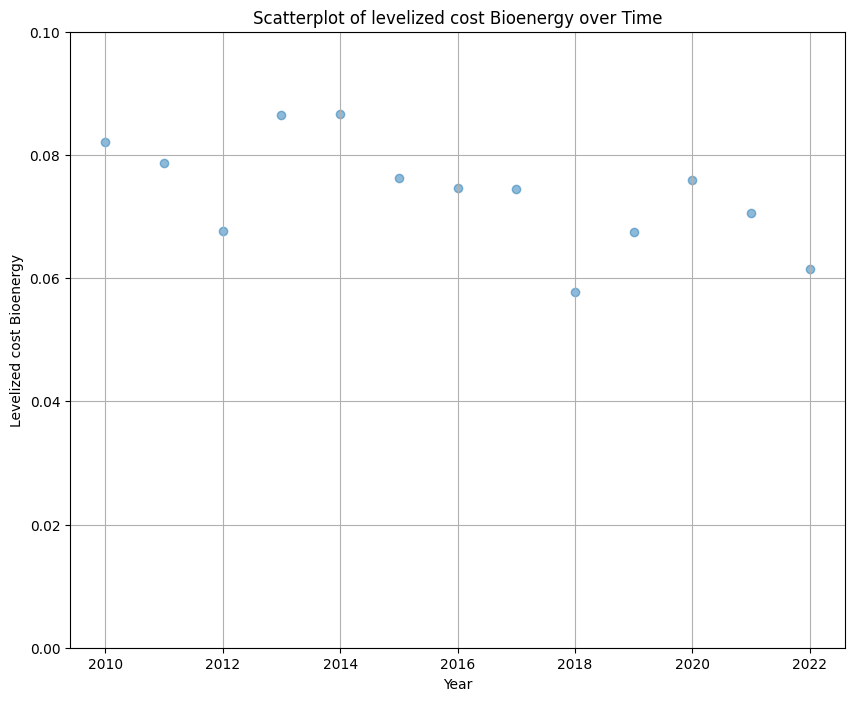

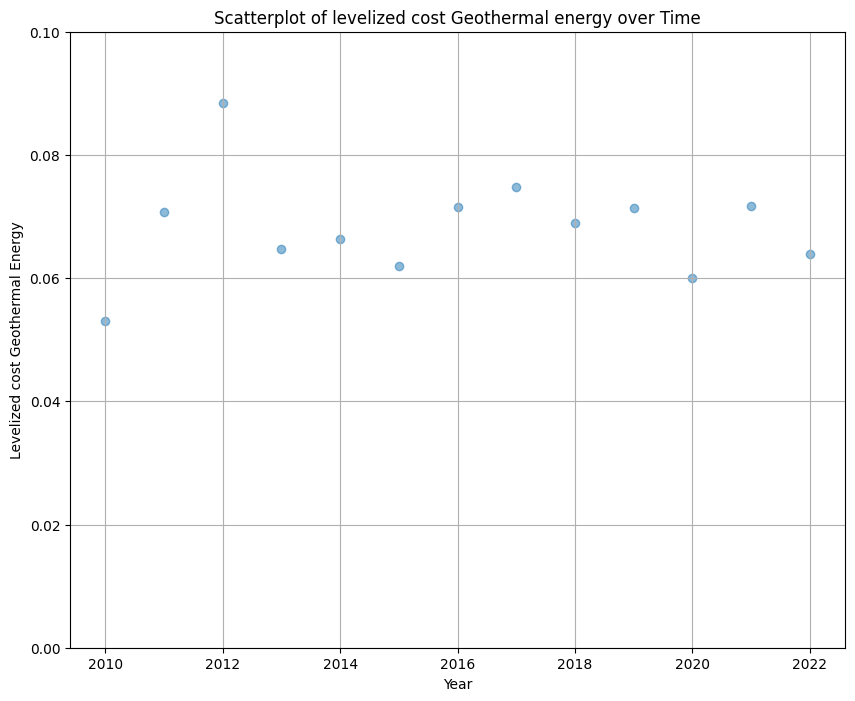

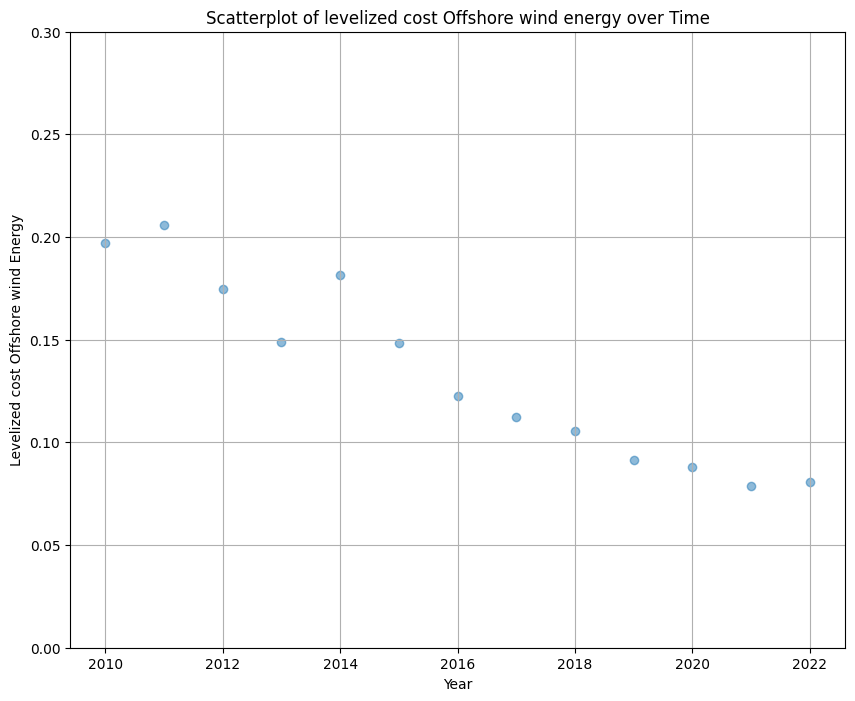

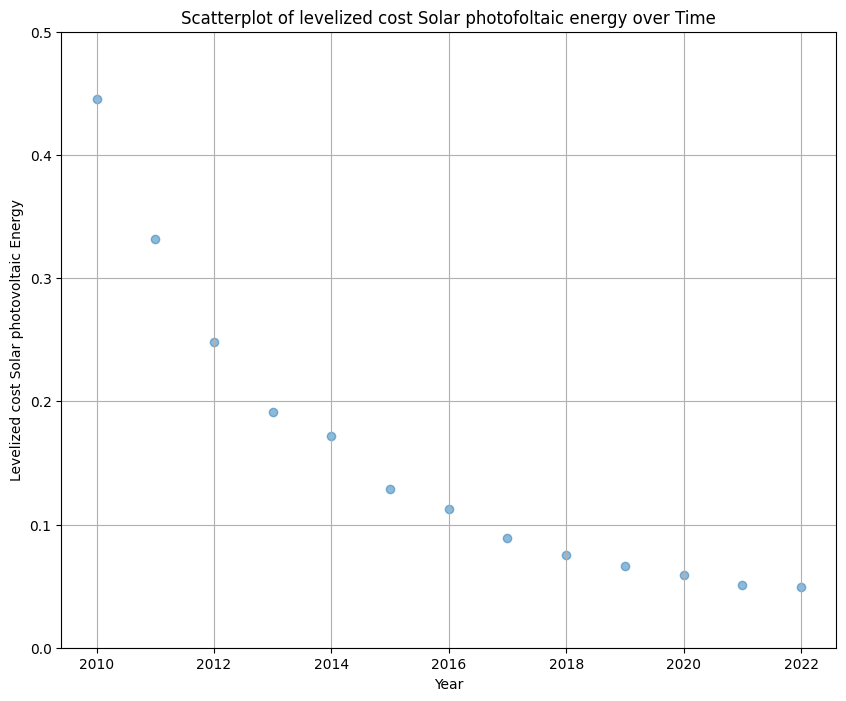

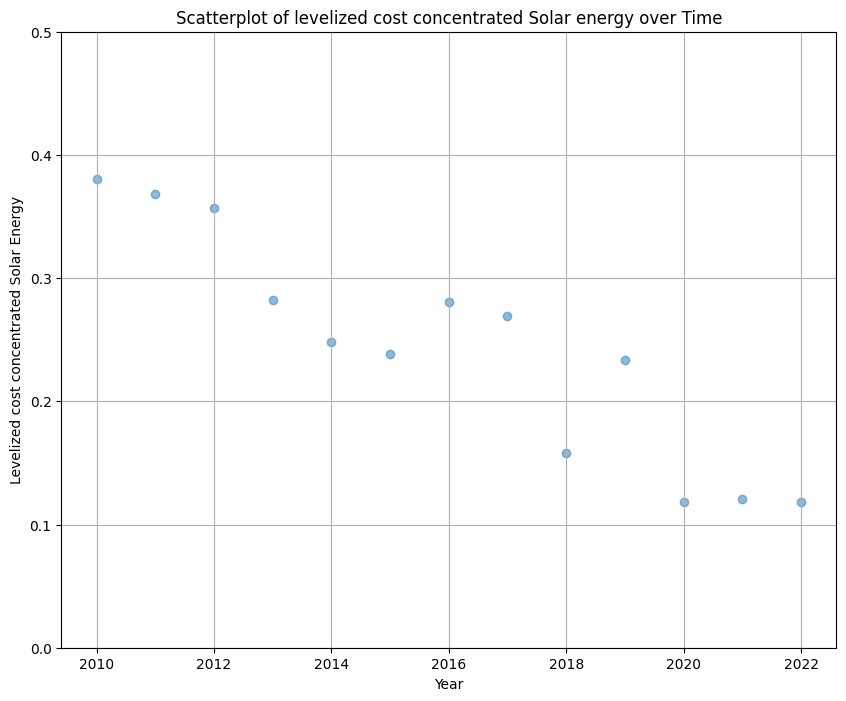

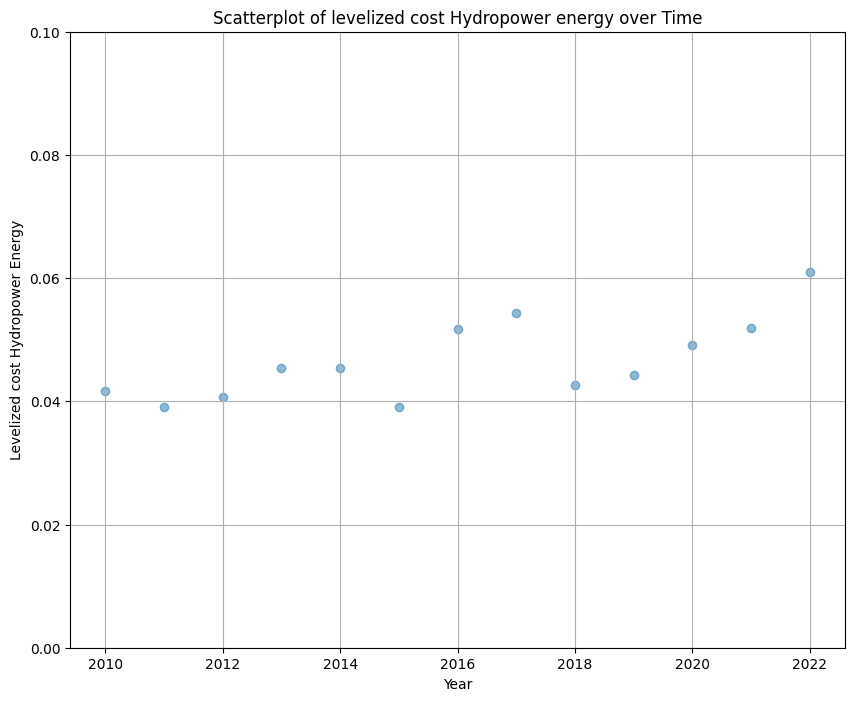

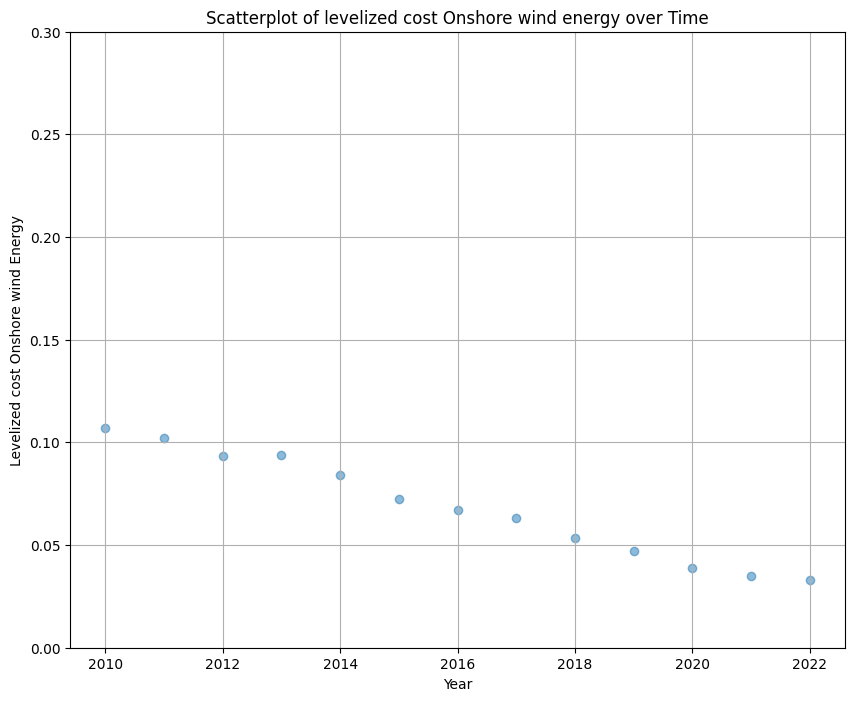

In [14]:
# A function for making a scatterplot
def plotgreenenergy(x, y, x_label, y_label, title, y_min=0, y_max=0.1):
    plt.figure(figsize=(10, 8))
    plt.scatter(x, y, alpha=0.5)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid()
    plt.ylim(y_min, y_max)
    plt.show()

plotgreenenergy(Q3_df3_interpolated['Year'], Q3_df3_interpolated['Bioenergy levelized cost of energy'], "Year", "Levelized cost Bioenergy", "Scatterplot of levelized cost Bioenergy over Time")
plotgreenenergy(Q3_df3_interpolated['Year'], Q3_df3_interpolated['Geothermal levelized cost of energy'], "Year", "Levelized cost Geothermal Energy", "Scatterplot of levelized cost Geothermal energy over Time")
plotgreenenergy(Q3_df3_interpolated['Year'], Q3_df3_interpolated['Offshore wind levelized cost of energy'], "Year", "Levelized cost Offshore wind Energy", "Scatterplot of levelized cost Offshore wind energy over Time", y_min=0, y_max=0.3)
plotgreenenergy(Q3_df3_interpolated['Year'], Q3_df3_interpolated['Solar photovoltaic levelized cost of energy'], "Year", "Levelized cost Solar photovoltaic Energy", "Scatterplot of levelized cost Solar photofoltaic energy over Time", y_min=0, y_max=0.5)
plotgreenenergy(Q3_df3_interpolated['Year'], Q3_df3_interpolated['Concentrated solar power levelized cost of energy'], "Year", "Levelized cost concentrated Solar Energy", "Scatterplot of levelized cost concentrated Solar energy over Time", y_min=0, y_max=0.5)
plotgreenenergy(Q3_df3_interpolated['Year'], Q3_df3_interpolated['Hydropower levelized cost of energy'], "Year", "Levelized cost Hydropower Energy", "Scatterplot of levelized cost Hydropower energy over Time")
plotgreenenergy(Q3_df3_interpolated['Year'], Q3_df3_interpolated['Onshore wind levelized cost of energy'], "Year", "Levelized cost Onshore wind Energy", "Scatterplot of levelized cost Onshore wind energy over Time", y_min=0, y_max=0.3)

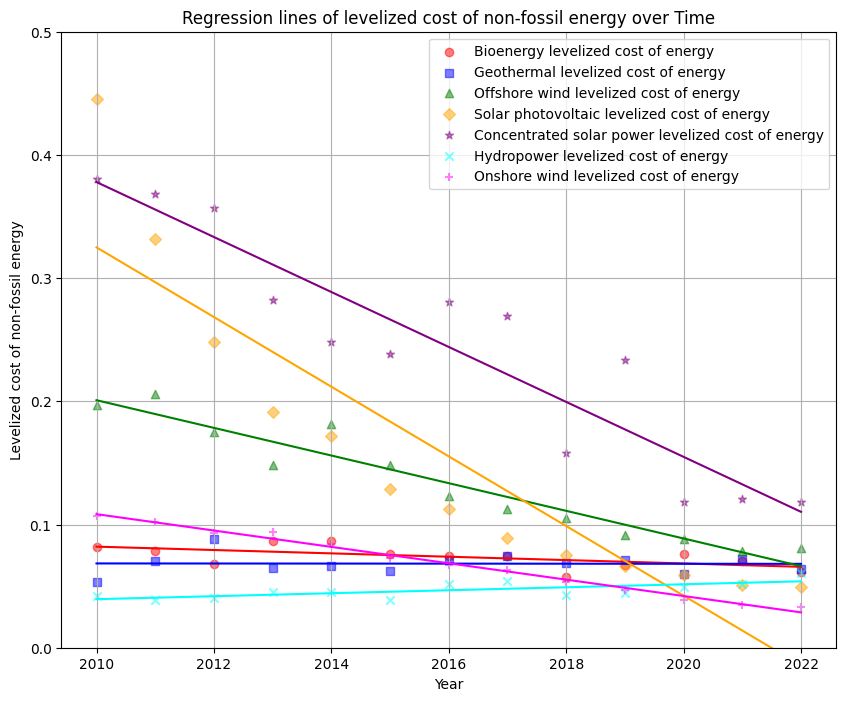

                                       Energy Source  Prediction for 2040
3        Solar photovoltaic levelized cost of energy            -0.523286
4  Concentrated solar power levelized cost of energy            -0.291224
2             Offshore wind levelized cost of energy            -0.135848
6              Onshore wind levelized cost of energy            -0.090916
0                 Bioenergy levelized cost of energy             0.041152
1                Geothermal levelized cost of energy             0.067569
5                Hydropower levelized cost of energy             0.075651


In [83]:
# Adding regression lines in 1 graph and calculating the predictions for the year 2040 (by using regression coefficients formulas)
def plotgreenenergy_multi(df, x_label, y_label, title, y_min=0, y_max=0.1, future_year=2040):
    results = []

    plt.figure(figsize=(10, 8))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid()
    plt.ylim(y_min, y_max)

    colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta']
    markers = ['o', 's', '^', 'D', '*', 'x', '+']

    for i, col in enumerate(df.columns[2:]):
        x = df['Year']
        y = df[col]
        color = colors[i % len(colors)]
        marker = markers[i % len(markers)]

        plt.scatter(x, y, alpha=0.5, label=col, color=color, marker=marker)

        try:
            coefs = poly.polyfit(x, y, 1)
            ffit = poly.polyval(x, coefs)
            plt.plot(x, ffit, color=color)

            prediction_2040 = poly.polyval(np.array([future_year]), coefs)[0]
            results.append([col, prediction_2040])

        except ValueError as error:
            print(f"Could not plot regression line for {col} because: {error}")

    plt.legend()
    plt.show()

    Q3_df4_prediction = pd.DataFrame(results, columns=['Energy Source', 'Prediction for 2040']).copy()
    Q3_df4_prediction.sort_values(by='Prediction for 2040', inplace=True, ascending=True)
    return Q3_df4_prediction

Q3_df4_prediction = plotgreenenergy_multi(Q3_df3_interpolated, "Year", "Levelized cost of non-fossil energy", "Regression lines of levelized cost of non-fossil energy over Time", y_min=0, y_max=0.5)
print(Q3_df4_prediction)
